# IF4071 Pembelajaran Mesin
## Tugas Kecil II: Eksplorasi `scikit-learn` pada Jupyter Notebook

Anggota kelompok:  
13514029 - Muhammad Farhan Majid  
13514065 - Geraldi Dzakwan  
13514095 - Muhammad Az-zahid Adhitya Silp  

### a. Membaca dataset standar iris dan dataset play-tennis

In [1]:
# Melakukan import dataset standard iris dan memisahkan data dan target
from sklearn import datasets
iris_dataset = datasets.load_iris()
X_iris = iris_dataset.data
Y_iris = iris_dataset.target
print(X_iris[0:5])
print(Y_iris[0:5])

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]
[0 0 0 0 0]


In [2]:
# Melakukan import dataset csv play tennis dan memisahkan data dan target
import pandas
ori_data_frame = pandas.read_csv('tennis.csv')

# axis = 1 artinya mau drop column
data_frame = ori_data_frame.drop('play', axis=1)
data_frame = data_frame.select_dtypes(include=[object])
# print(data_frame.columns)

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_2 = data_frame.apply(le.fit_transform)
# print(df_2)

one_hot_encoder = preprocessing.OneHotEncoder()
one_hot_encoder.fit(df_2)
one_hot_labels = one_hot_encoder.transform(df_2).toarray()

X_tennis = one_hot_labels
Y_tennis = []

for row in ori_data_frame.index:
    Y_tennis.append(ori_data_frame['play'][row])

print(X_tennis[0:5])
print(Y_tennis[0:5])

[[ 0.  0.  1.  0.  1.  0.  1.  0.]
 [ 0.  0.  1.  0.  1.  0.  1.  0.]
 [ 1.  0.  0.  0.  1.  0.  1.  0.]
 [ 0.  1.  0.  0.  0.  1.  1.  0.]
 [ 0.  1.  0.  1.  0.  0.  0.  1.]]
['no', 'no', 'yes', 'yes', 'yes']


### b. Melakukan pembelajaran DecisionTree dan Artificial Neural Network untuk dataset iris dengan skema full-training dan menampilkan modelnya

In [3]:
# Melakukan pembelajaran full training dengan DecisionTree
from sklearn import tree
clf_tree = tree.DecisionTreeClassifier()
clf_tree = clf_tree.fit(X_iris, Y_iris)
clf_tree_2 = tree.DecisionTreeClassifier()
clf_tree_2 = clf_tree_2.fit(X_tennis, Y_tennis)
# Menampilkan hasil prediksi terhadap 5 instance awal
print(clf_tree.predict(X_iris[:5]))
print(clf_tree_2.predict(X_tennis[:5]))

[0 0 0 0 0]
['no' 'no' 'yes' 'no' 'no']


In [4]:
# Menampilkan model pembelajaran tree
data_feature_names = iris_dataset.feature_names
data_feature_names_2 = ['outlook', 'temp', 'humidity']
data_target_names = iris_dataset.target_names
data_target_names_2 = ['no', 'yes']
dot_model = tree.export_graphviz(clf_tree, feature_names = data_feature_names, class_names = data_target_names, out_file = None) 
dot_model_2 = tree.export_graphviz(clf_tree_2, class_names = data_target_names_2, out_file = None) 

# import graphviz
# import os
# os.environ["PATH"] += os.pathsep + 'D:/Graphviz2.38/bin/'
# tree_viz = graphviz.Source(dot_model) 
# tree_viz.render('tree_iris')
# tree_viz_2 = graphviz.Source(dot_model_2) 
# tree_viz_2.render('tree_tennis')

In [5]:
# Melakukan pembelajaran full training dengan MLP
from sklearn.neural_network import MLPClassifier
clf_mlp = MLPClassifier(solver='sgd', max_iter = 10000, alpha=1e-3, hidden_layer_sizes=(4,3))
clf_mlp.fit(X_iris, Y_iris)
clf_mlp_2 = MLPClassifier(solver='sgd', max_iter = 10000, alpha=1e-3, hidden_layer_sizes=(4,3))
clf_mlp_2.fit(X_tennis, Y_tennis)
# Menampilkan hasil prediksi terhadap 5 instance awal
print(clf_mlp.predict(X_iris[:5]))
print(clf_mlp_2.predict(X_tennis[:5]))

[0 0 0 0 0]
['no' 'no' 'yes' 'yes' 'yes']


In [6]:
# Menampilkan model pembelajaran MLP untuk iris
for i in range(0, len(clf_mlp.coefs_)):
    print('Intercepts:')
    print(clf_mlp.intercepts_[i])
    print('Weights:')
    print(clf_mlp.coefs_[i])

Intercepts:
[-0.8215111   0.03792671  0.47433131 -0.69883624]
Weights:
[[ 0.25137212 -0.30135532 -0.26452735 -0.17782126]
 [-0.1899402  -0.91585396 -0.44606858 -0.30244821]
 [-0.48244183  1.28647226 -0.05637523 -0.17090676]
 [ 0.7645969   0.67910903  0.05917722  0.03782169]]
Intercepts:
[-0.6777617   2.09574508 -1.50209404]
Weights:
[[ 0.21762866 -0.77781707  0.45708547]
 [-0.51269409 -1.36633105  0.76748433]
 [ 0.79056389  0.81932707  0.90228188]
 [ 0.09646805  0.71168332  0.63517501]]
Intercepts:
[-1.78927038  1.57740129 -0.02923297]
Weights:
[[ 0.92091791 -0.61390425 -0.16100131]
 [ 2.16017693 -1.31642236 -1.13334647]
 [-0.32900895 -1.65739827  0.93188463]]


In [7]:
# Menampilkan model pembelajaran MLP untuk tennis
for i in range(0, len(clf_mlp_2.coefs_)):
    print('Intercepts:')
    print(clf_mlp_2.intercepts_[i])
    print('Weights:')
    print(clf_mlp_2.coefs_[i])

Intercepts:
[-0.00433307  0.43120452  0.00663104  0.54045617]
Weights:
[[ 0.01406858 -0.17919892 -0.20542666 -0.01631816]
 [-0.04060335  0.31644185 -0.11456938  0.29369877]
 [-0.53769996 -0.32231686  1.07681814  0.00771278]
 [-0.33570573 -0.3262576  -0.29045649  0.40435762]
 [-0.61066012 -0.52758032 -0.06663093  0.11748347]
 [ 0.13131685 -0.64360147 -0.28217698 -0.12931753]
 [-0.65063503 -0.6943565   0.31953696 -0.70492428]
 [ 0.23228869 -0.64656024 -0.80122838 -0.47170666]]
Intercepts:
[ 1.2271369   0.12851237  0.19130892]
Weights:
[[-0.14095791 -0.04963761 -0.74097762]
 [-0.53756928 -0.77824767  0.87391964]
 [-0.54993434  0.7699951   0.99294528]
 [-0.08687547 -0.59716092  0.19227537]]
Intercepts:
[-0.31272088]
Weights:
[[ 1.62880408]
 [-1.15188294]
 [-1.11877208]]


### c. Melakukan pembelajaran DecisionTree dan ANN untuk dataset iris dengan skema split train 90% dan test 10% dan menampilkan kinerja serta confusion matrixnya

In [8]:
#C ANN + Decision Tree Split test
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

#Pisah data menjadi train dan test
irisTrainX, irisTestX, irisTrainY, irisTestY =  train_test_split(X_iris, Y_iris, test_size=0.1, train_size=0.9)

#Make Classifier
decisionTree = tree.DecisionTreeClassifier()
multiLayerANN = MLPClassifier(solver = "lbfgs")
decisionTree.fit(irisTrainX, irisTrainY)
multiLayerANN.fit(irisTrainX, irisTrainY)

treePredict = decisionTree.predict(irisTestX)
annPredict = multiLayerANN.predict(irisTestX)

print(treePredict)
treeAccuracy = accuracy_score(irisTestY, treePredict)
treeMatrix = confusion_matrix(irisTestY, treePredict)
print()
print("Accuracy : ") 
print(treeAccuracy)
print()
print("Confusion Matrix :")
print(treeMatrix)
print()

print(annPredict)
annAccuracy = accuracy_score(irisTestY, annPredict)
annMatrix = confusion_matrix(irisTestY, annPredict)
print()
print("Accuracy : ") 
print(annAccuracy)
print()
print("Confusion Matrix :")
print(annMatrix)
print()




[1 0 0 1 0 2 0 2 0 2 0 2 0 1 1]
()
Accuracy : 
0.933333333333
()
Confusion Matrix :
[[7 0 0]
 [0 4 1]
 [0 0 3]]
()
[1 0 0 1 0 2 0 1 0 2 0 2 0 1 1]
()
Accuracy : 
1.0
()
Confusion Matrix :
[[7 0 0]
 [0 5 0]
 [0 0 3]]
()


### d. Melakukan pembelajaran DecisionTree dan ANN untuk dataset iris dengan skema 10-fold cross validation dan menampilkan kinerjanya

In [9]:
#D 10-fold Cross validation for decision tree and ANN
from sklearn.model_selection import cross_val_score
decisionTree2 = tree.DecisionTreeClassifier()
multiLayerANN2 = MLPClassifier(solver = "lbfgs")

treeCrossVal = cross_val_score(decisionTree2, X_iris, Y_iris, cv=10)
print("\nTree Score :")
print(treeCrossVal)
print("Accuracy: %0.2f (+/- %0.2f)" % (treeCrossVal.mean(), treeCrossVal.std() * 2))
annCrossVal = cross_val_score(multiLayerANN2, X_iris, Y_iris, cv=10)
print("\nANN Score :")
print(annCrossVal)
print("Accuracy: %0.2f (+/- %0.2f)" % (annCrossVal.mean(), annCrossVal.std() * 2))




Tree Score :
[ 1.          0.93333333  1.          0.93333333  0.93333333  0.86666667
  0.93333333  1.          1.          1.        ]
Accuracy: 0.96 (+/- 0.09)

ANN Score :
[ 1.          0.93333333  1.          1.          0.93333333  1.
  0.86666667  1.          1.          1.        ]
Accuracy: 0.97 (+/- 0.09)


### e. Menyimpan (save) model/hipotesis hasil pembelajaran ke sebuah file eksternal
dan 
### f. Membaca (read) model/hipotesis dari file eksternal

In [10]:
# Melakukan import dan export model
from sklearn.externals import joblib
def save_model(model, filename):
    joblib.dump(model, filename)
    
def load_model(filename):
    clf = joblib.load(filename)
    return clf

In [11]:
# Meng-export full training MLP dan DTree
save_model(clf_tree, "full_training_Tree_Iris.model")
save_model(clf_mlp, "full_training_MLP_Iris.model")
save_model(clf_tree_2, "full_training_Tree_Tennis.model")
save_model(clf_mlp_2, "full_training_MLP_Tennis.model")

# Me-load full training MLP dan DTree
clf_mlp = load_model("full_training_MLP_Iris.model")
clf_tree = load_model("full_training_Tree_Iris.model")
clf_mlp_2 = load_model("full_training_MLP_Tennis.model")
clf_tree_2 = load_model("full_training_Tree_Tennis.model")

# Tes apakah berhasil load dengan melakukan prediksi
print(clf_mlp.predict(X_iris[:5]))
print(clf_tree.predict(X_iris[:5]))
print(clf_mlp_2.predict(X_tennis[:5]))
print(clf_tree_2.predict(X_tennis[:5]))

[0 0 0 0 0]
[0 0 0 0 0]
['no' 'no' 'yes' 'yes' 'yes']
['no' 'no' 'yes' 'no' 'no']


### g. Membuat instance baru dengan memberi nilai untuk setiap atribut

In [12]:
#G Create new instances
from sklearn import datasets
import numpy as np

iris_dataset = datasets.load_iris()
X_iris = iris_dataset.data
Y_iris = iris_dataset.target

X = []
print("Input attributes with", X_iris.dtype, " type") 
for i in range(0, len(X_iris[0])):
    inp = input()
    X.append(inp)

X = np.array(X, dtype=X_iris.dtype)
print("Input attributes with", Y_iris.dtype, " type") 
Y = np.array(input(), dtype=Y_iris.dtype)

print("\nX = ", X)
print("Y = ", Y)

('Input attributes with', dtype('float64'), ' type')
2
2
2
2
('Input attributes with', dtype('int32'), ' type')
1
('\nX = ', array([ 2.,  2.,  2.,  2.]))
('Y = ', array(1))


### h. Melakukan klasifikasi dengan memanfaatkan model/hipotesis DecisionTree, and ANN pada instance pada g.

In [13]:
# DecisionTree model
X = X.reshape(1, -1) # reshape for single sample
print "Prediction DT: %s (%s)" % (decisionTree.predict(X)[0], iris_dataset.target_names[decisionTree.predict(X)[0]])

# ANN model
print "Prediction ANN: %s (%s)" % (multiLayerANN.predict(X)[0], iris_dataset.target_names[multiLayerANN.predict(X)[0]])

Prediction DT: 0 (setosa)
Prediction ANN: 1 (versicolor)


### i. Melakukan analisis fitur dengan visualisasi hubungan setiap fitur dengan kelas. Gunakanlah `seaborn`

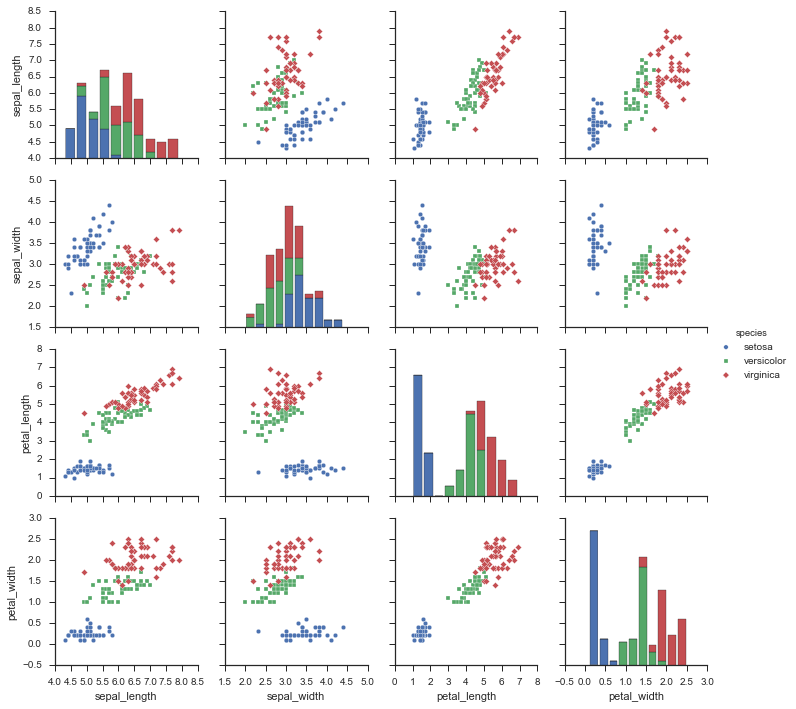

In [14]:
%matplotlib inline
import seaborn as sns
sns.set(style="ticks", color_codes=True)
iris = sns.load_dataset("iris")
sns.pairplot(iris, hue="species", markers=["o", "s", "D"])